In [1]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import model_selection
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import StratifiedKFold


In [2]:
df = pd.read_csv('/home/chris/Documents/Datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


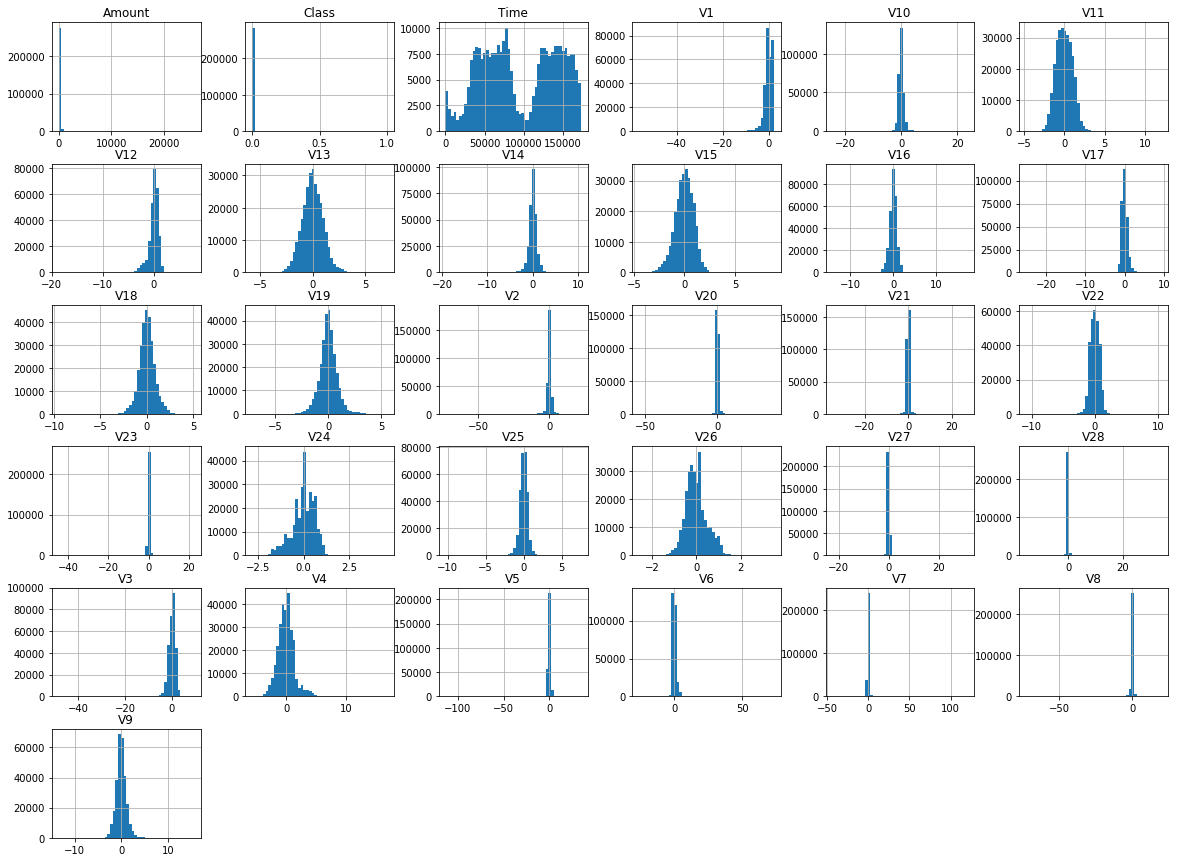

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [3]:
#Split data into training and test set, so that we can first use the cross-validation scores. Afterwards we will set asside a fixed CV-set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Class"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

train_set = train_set.reset_index(drop = True)

In [4]:
#Sanity check
len(train_set), len(test_set)

(227845, 56962)

In [5]:
credit_card = train_set.copy()
corr_matrix = credit_card.corr()
corr_matrix['Amount'].sort_values()

V2       -0.530143
V5       -0.386767
V1       -0.227035
V3       -0.211310
V23      -0.114022
V8       -0.102719
V10      -0.102396
V22      -0.063479
V19      -0.056643
V25      -0.047429
V9       -0.043365
Time     -0.010105
V12      -0.009360
V26      -0.004545
V16      -0.002535
V15      -0.001770
V11       0.000005
V24       0.004889
Class     0.006211
V17       0.006313
V13       0.007095
V28       0.008311
V14       0.032659
V27       0.033727
V18       0.036066
V4        0.099970
V21       0.102266
V6        0.217895
V20       0.333663
V7        0.398941
Amount    1.000000
Name: Amount, dtype: float64

/home/chris/Documents/ml/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46d350a828>,
      dtype=object)

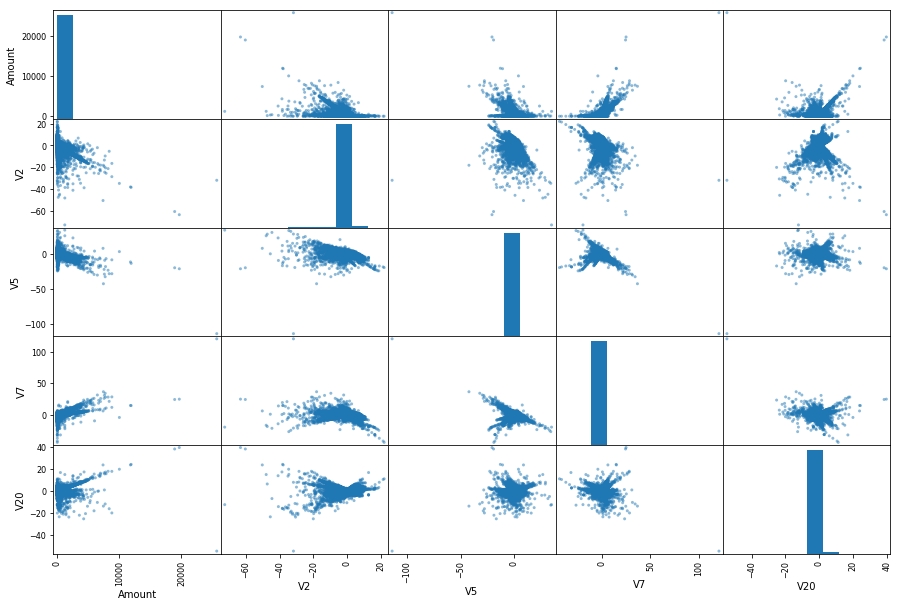

In [10]:
attributes = ["Amount", "V2", "V5", "V7", "V20"]

scatter_matrix(credit_card[attributes], figsize=(15,10))


In [6]:
n = credit_card.shape[1]
X_train = credit_card.iloc[:,0:(n-1)]
y_train = credit_card.iloc[:,n-1]

data = X_train
scaler = StandardScaler()
scaler.fit(data)
X_train_scaled = scaler.transform(data)

In [7]:
#models that can output a probability

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier())) #takes long long time
#models.append(('CART', DecisionTreeClassifier())) #takes too long time
#models.append(('NB', GaussianNB()))
#models.append(('SVM', LinearSVC())) #takes a very long time

# evaluate each model in turn
results = []
names = []
scoring = ['f1', 'average_precision','recall','precision'] #average_precision
for name, model in models:
    kfold = StratifiedKFold(n_splits=4) #random folds but keeps the correct proportion of the class
    names.append(name)
    for score in scoring:
        cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, 
                                                     scoring=score)
        results.append(cv_results)
        msg = "%s, %s: %f (%f)" % (name, score, cv_results.mean(), cv_results.std())
        print(msg)        
    


LDA, f1: 0.811925 (0.016302)
LDA, average_precision: 0.755817 (0.018696)
LDA, recall: 0.756313 (0.028150)
LDA, precision: 0.878168 (0.031166)
QDA, f1: 0.115237 (0.006294)
QDA, average_precision: 0.644864 (0.033952)
QDA, recall: 0.865466 (0.029192)
QDA, precision: 0.061730 (0.003465)


In [8]:
#models that do not output a probability

models = []

models.append(('SVM', LinearSVC())) #takes a very long time

# evaluate each model in turn
results = []
names = []
scoring = ['f1', 'recall'] #average_precision
for name, model in models:
    kfold = StratifiedKFold(n_splits=4) #random folds but keeps the correct proportion of the class
    names.append(name)
    for score in scoring:
        cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, 
                                                     scoring=score)
        results.append(cv_results)
        msg = "%s, %s: %f (%f)" % (name, score, cv_results.mean(), cv_results.std())
        print(msg)        
    

SVM, f1: 0.627773 (0.169557)
SVM, recall: 0.715754 (0.065854)
